# 🐕 70-CLASS DOG BREED CLASSIFICATION

In [1]:
# Cell 1: Import libraries and define paths
import pathlib
from PIL import Image
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import shutil
import os
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

In [2]:
# Define paths
original_dir = pathlib.Path(r'C:\SMIT-PYTHON\ZA Deep Learning\CNN\Dog breed Classfier\OG_DATA')
new_base_dir = pathlib.Path(r'C:\SMIT-PYTHON\ZA Deep Learning\CNN\Dog breed Classfier')

In [3]:
# Cell 2: Get dog breeds function and call (UNCHANGED)
def get_dog_breeds(train_path):
    """Get list of dog breed folders from train directory"""
    try:
        train_dir = pathlib.Path(train_path)
        if not train_dir.exists():
            print(f"Error: Train directory {train_dir} does not exist!")
            return []
        
        breeds = [item.name for item in train_dir.iterdir() if item.is_dir()]
        print(f"Found {len(breeds)} dog breeds: {breeds[:5]}..." if len(breeds) > 5 else f"Found {len(breeds)} dog breeds: {breeds}")
        return breeds
    except Exception as e:
        print(f"Error reading breeds: {e}")
        return []

In [4]:
# Get dog breeds from original train folder
original_train_dir = original_dir / 'train'
dog_breeds = get_dog_breeds(original_train_dir)
print(f"Total breeds found: {len(dog_breeds)}")

Found 70 dog breeds: ['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless', 'American Spaniel']...
Total breeds found: 70


In [5]:
# Cell 3: Create directory structure function and call (UNCHANGED)
def create_directory_structure(base_dir, breeds):
    """Create train/validation/test directory structure for each breed"""
    print("Creating directory structure...")
    
    for split in ['train', 'validation', 'test']:
        split_dir = base_dir / split
        split_dir.mkdir(exist_ok=True)
        
        for breed in breeds:
            breed_dir = split_dir / breed
            breed_dir.mkdir(parents=True, exist_ok=True)
    
    print(f"✓ Directory structure created at {base_dir}")

In [6]:
# Create directory structure
create_directory_structure(new_base_dir, dog_breeds)

Creating directory structure...
✓ Directory structure created at C:\SMIT-PYTHON\ZA Deep Learning\CNN\Dog breed Classfier


In [7]:
# Cell 4: Image handling functions (UNCHANGED)
def get_image_files(directory):
    """Get all image files from a directory"""
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
    image_files = []
    
    if not directory.exists():
        return image_files
    
    for file in directory.iterdir():
        if file.is_file() and file.suffix.lower() in image_extensions:
            image_files.append(file)
    
    return sorted(image_files, key=lambda x: x.name)  # Sort for consistent ordering

In [8]:
# IMPROVED: Increased max_train_images for 70 classes
def copy_images_with_limit(source_dir, dest_dir, max_images=200):  # CHANGED: 100 → 200
    """Copy images from source to destination with optional limit"""
    image_files = get_image_files(source_dir)
    
    if not image_files:
        return 0
    
    # Apply limit if specified
    if max_images and len(image_files) > max_images:
        image_files = image_files[:max_images]
    
    copied_count = 0
    for img_file in image_files:
        dest_file = dest_dir / img_file.name
        try:
            shutil.copy2(img_file, dest_file)
            copied_count += 1
        except Exception as e:
            print(f"Error copying {img_file.name}: {e}")
    
    return copied_count

print("✓ Image handling functions defined")

✓ Image handling functions defined


In [9]:
# Cell 5: Organize dataset function and call (IMPROVED)
def organize_dataset(original_dir, new_base_dir, breeds, max_train_images=200):  # CHANGED: 100 → 200
    """Main function to organize the dataset"""
    
    # Process each split (train, validation, test)
    splits_to_process = ['train', 'validation', 'test']
    
    # Check which splits exist in original data
    existing_splits = []
    for split in splits_to_process:
        split_dir = original_dir / split
        if split_dir.exists():
            existing_splits.append(split)
        elif split == 'validation':
            # Check for 'val' folder as alternative
            val_dir = original_dir / 'val'
            if val_dir.exists():
                existing_splits.append('val')
    
    print(f"Found existing splits: {existing_splits}")
    
    # Copy images for each split
    for split in existing_splits:
        source_split_dir = original_dir / split
        dest_split_name = 'validation' if split == 'val' else split
        
        print(f"\nProcessing {split} -> {dest_split_name}")
        
        total_copied = 0
        for breed in breeds:
            source_breed_dir = source_split_dir / breed
            dest_breed_dir = new_base_dir / dest_split_name / breed
            
            if not source_breed_dir.exists():
                print(f"Warning: {breed} folder not found in {split}")
                continue
            
            # Apply image limit only to training data
            max_images = max_train_images if split == 'train' else None
            
            copied_count = copy_images_with_limit(
                source_breed_dir, 
                dest_breed_dir, 
                max_images
            )
            
            if copied_count > 0:
                limit_msg = f" (limited to {max_images})" if max_images and split == 'train' else ""
                print(f"  {breed}: {copied_count} images{limit_msg}")
                total_copied += copied_count
        
        print(f"✓ {dest_split_name}: {total_copied} total images copied")
    
    return True

In [10]:
# Organize the dataset with more images per class
print("\nStep 1: Organizing dataset...")
success = organize_dataset(original_dir, new_base_dir, dog_breeds, max_train_images=50)  # CHANGED

if not success:
    print("Failed to organize dataset.")
else:
    print("✓ Dataset organization completed successfully!")


Step 1: Organizing dataset...
Found existing splits: ['train', 'validation', 'test']

Processing train -> train
  Afghan: 50 images (limited to 50)
  African Wild Dog: 50 images (limited to 50)
  Airedale: 50 images (limited to 50)
  American Hairless: 50 images (limited to 50)
  American Spaniel: 50 images (limited to 50)
  Basenji: 50 images (limited to 50)
  Basset: 50 images (limited to 50)
  Beagle: 50 images (limited to 50)
  Bearded Collie: 50 images (limited to 50)
  Bermaise: 50 images (limited to 50)
  Bichon Frise: 50 images (limited to 50)
  Blenheim: 50 images (limited to 50)
  Bloodhound: 50 images (limited to 50)
  Bluetick: 50 images (limited to 50)
  Border Collie: 50 images (limited to 50)
  Borzoi: 50 images (limited to 50)
  Boston Terrier: 50 images (limited to 50)
  Boxer: 50 images (limited to 50)
  Bull Mastiff: 50 images (limited to 50)
  Bull Terrier: 50 images (limited to 50)
  Bulldog: 50 images (limited to 50)
  Cairn: 50 images (limited to 50)
  Chihuahua

In [16]:
# Cell 6: Image validation function and call (UNCHANGED)
def validate_and_clean_images(directory):
    """Remove corrupted or invalid image files from directory"""
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
    removed_count = 0
    
    print(f"Validating images in {directory}...")
    
    for file_path in directory.rglob('*'):
        if file_path.is_file():
            # Check file extension
            if file_path.suffix.lower() not in valid_extensions:
                print(f"Removing non-image file: {file_path}")
                try:
                    file_path.unlink()
                    removed_count += 1
                except Exception as e:
                    print(f"Could not remove {file_path}: {e}")
                continue
            
            # Check if file can be opened as image
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify image integrity
                # Reopen to check if it can be loaded properly
                with Image.open(file_path) as img:
                    img.load()  # Actually load the image data
            except (IOError, OSError, Image.DecompressionBombError) as e:
                print(f"Removing corrupted image: {file_path} - Error: {e}")
                try:
                    file_path.unlink()
                    removed_count += 1
                except Exception as del_error:
                    print(f"Could not delete {file_path}: {del_error}")
    
    print(f"Removed {removed_count} invalid/corrupted files from {directory}")

In [17]:
# Clean the datasets
print("Cleaning training data...")
validate_and_clean_images(new_base_dir / "train")
print("Cleaning validation data...")
validate_and_clean_images(new_base_dir / "validation")
print("Cleaning test data...")
validate_and_clean_images(new_base_dir / "test")

Cleaning training data...
Validating images in C:\SMIT-PYTHON\ZA Deep Learning\CNN\Dog breed Classfier\train...
Removed 0 invalid/corrupted files from C:\SMIT-PYTHON\ZA Deep Learning\CNN\Dog breed Classfier\train
Cleaning validation data...
Validating images in C:\SMIT-PYTHON\ZA Deep Learning\CNN\Dog breed Classfier\validation...
Removed 0 invalid/corrupted files from C:\SMIT-PYTHON\ZA Deep Learning\CNN\Dog breed Classfier\validation
Cleaning test data...
Validating images in C:\SMIT-PYTHON\ZA Deep Learning\CNN\Dog breed Classfier\test...
Removed 0 invalid/corrupted files from C:\SMIT-PYTHON\ZA Deep Learning\CNN\Dog breed Classfier\test


In [18]:
# Cell 7: Create datasets function and call (IMPROVED)
def create_datasets_with_error_handling(new_base_dir, image_size=(224, 224), batch_size=16):  # CHANGED: (180,180) → (224,224), 32 → 16
    """Create TensorFlow datasets with error handling"""
    datasets = {}
    
    # Create datasets with error handling
    for split in ['train', 'validation', 'test']:
        split_dir = new_base_dir / split
        
        if not split_dir.exists():
            print(f"Warning: {split_dir} does not exist")
            continue
            
        try:
            shuffle_data = split == 'train'  # Only shuffle training data
            
            dataset = image_dataset_from_directory(
                split_dir,
                image_size=image_size,
                batch_size=batch_size,
                shuffle=shuffle_data,
                seed=123
            )
            print(f"{split.capitalize()} dataset created successfully")
            datasets[split] = dataset
            
        except Exception as e:
            print(f"Error creating {split} dataset: {e}")
            try:
                # Try with smaller batch size
                smaller_batch = max(8, batch_size // 2)
                dataset = image_dataset_from_directory(
                    split_dir,
                    image_size=image_size,
                    batch_size=smaller_batch,
                    shuffle=shuffle_data,
                    seed=123
                )
                print(f"{split.capitalize()} dataset created with reduced batch size {smaller_batch}")
                datasets[split] = dataset
            except Exception as e2:
                print(f"Failed to create {split} dataset: {e2}")
    
    return datasets

In [19]:
def make_robust_dataset(dataset):
    """Make dataset more robust by handling potential errors"""
    return dataset.apply(tf.data.experimental.ignore_errors())

In [20]:
# IMPROVED: Create TensorFlow datasets with better parameters
print("\nStep 2: Creating TensorFlow datasets...")
datasets = create_datasets_with_error_handling(new_base_dir, image_size=(224, 224), batch_size=16)  # CHANGED


Step 2: Creating TensorFlow datasets...
Found 3500 files belonging to 70 classes.
Train dataset created successfully
Found 700 files belonging to 70 classes.
Validation dataset created successfully
Found 700 files belonging to 70 classes.
Test dataset created successfully


In [21]:
# Extract datasets
train_dataset = datasets.get('train')
validation_dataset = datasets.get('validation') 
test_dataset = datasets.get('test')

In [22]:
# Make datasets robust and optimize for performance
AUTOTUNE = tf.data.AUTOTUNE
if train_dataset:
    train_dataset = make_robust_dataset(train_dataset).prefetch(buffer_size=AUTOTUNE)
if validation_dataset:
    validation_dataset = make_robust_dataset(validation_dataset).prefetch(buffer_size=AUTOTUNE)
if test_dataset:
    test_dataset = make_robust_dataset(test_dataset).prefetch(buffer_size=AUTOTUNE)

print(f"✓ Datasets created: Train={train_dataset is not None}, Val={validation_dataset is not None}, Test={test_dataset is not None}")

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.
✓ Datasets created: Train=True, Val=True, Test=True


In [23]:
# Cell 8: Load VGG16 and create data augmentation (IMPROVED)
print("\nStep 3: Loading VGG16 base model...")
conv_base = tf.keras.applications.vgg16.VGG16(
                                                weights="imagenet",
                                                include_top=False,
                                                input_shape=(224, 224, 3)  # CHANGED: (180,180,3) → (224,224,3)
                                            )


Step 3: Loading VGG16 base model...


In [24]:
print("Step 4: Creating enhanced data augmentation pipeline...")
# IMPROVED: Enhanced data augmentation for 70 classes
data_augmentation = keras.Sequential([
                                        layers.RandomFlip("horizontal"),
                                        layers.RandomRotation(0.15),  # CHANGED: 0.1 → 0.15
                                        layers.RandomZoom(0.2),
                                        layers.RandomContrast(0.2),   # NEW: Added contrast augmentation
                                        layers.RandomBrightness(0.2), # NEW: Added brightness augmentation
                                    ])

print("✓ VGG16 model and enhanced data augmentation pipeline ready")

Step 4: Creating enhanced data augmentation pipeline...
✓ VGG16 model and enhanced data augmentation pipeline ready


In [25]:
# Cell 9: Create feature extractor function and call (IMPROVED)
def create_feature_extractor():
    """Create a model that applies augmentation and extracts features"""
    inputs = keras.Input(shape=(224, 224, 3))  # CHANGED: (180,180,3) → (224,224,3)
    
    # Apply data augmentation
    x = data_augmentation(inputs, training=True)
    
    # Apply VGG16 preprocessing
    x = keras.applications.vgg16.preprocess_input(x)
    
    # Extract features using VGG16
    x = conv_base(x, training=False)  # Keep VGG16 frozen
    
    feature_extractor = keras.Model(inputs, x)
    return feature_extractor

In [26]:
# Create feature extractor
feature_extractor = create_feature_extractor()
print("✓ Feature extractor model created")

✓ Feature extractor model created


In [27]:
# Cell 10: Feature extraction function (IMPROVED)
def get_augmented_features_and_labels(dataset, feature_extractor, augment_factor=5):  # CHANGED: 3 → 5
    """Extract features with data augmentation"""
    all_features = []
    all_labels = []
    
    for batch_num, (images, labels) in enumerate(dataset):
        try:
            print(f"Processing batch {batch_num + 1}...")
            
            # Original images (no augmentation for validation)
            if 'validation' in str(dataset) or 'test' in str(dataset):
                # For validation/test, apply preprocessing without augmentation
                preprocessed_images = keras.applications.vgg16.preprocess_input(images)
                features = conv_base.predict(preprocessed_images, verbose=0)
                all_features.append(features)
                all_labels.append(labels.numpy())
            else:
                # For training, apply augmentation multiple times
                for aug_iter in range(augment_factor):
                    features = feature_extractor.predict(images, verbose=0)
                    all_features.append(features)
                    all_labels.append(labels.numpy())
            
        except Exception as e:
            print(f"Error processing batch {batch_num + 1}: {e}")
            print("Skipping this batch and continuing...")
            continue
    
    if not all_features:
        raise ValueError("No valid batches processed. Please check your dataset.")
    
    return np.concatenate(all_features), np.concatenate(all_labels)

print("✓ Feature extraction function defined")

✓ Feature extraction function defined


In [28]:
# NEW: Add class weight computation function
def compute_class_weights_from_labels(labels):
    """Compute class weights for imbalanced 70-class problem"""
    unique_classes = np.unique(labels)
    class_weights_array = compute_class_weight('balanced', classes=unique_classes, y=labels)
    class_weights = {i: class_weights_array[i] for i in range(len(unique_classes))}
    return class_weights

In [29]:
# Cell 11: Extract training features (IMPROVED)
print("\nStep 6: Extracting features...")

if train_dataset:
    print("Extracting training features with enhanced augmentation...")
    train_features, train_labels = get_augmented_features_and_labels(
        train_dataset, feature_extractor, augment_factor=5  # CHANGED: 3 → 5
    )
    print(f"Train features shape: {train_features.shape}")
    
    # NEW: Compute class weights for 70-class imbalance
    print("Computing class weights for balanced training...")
    class_weights = compute_class_weights_from_labels(train_labels)
    print(f"Class weights computed for {len(class_weights)} classes")
else:
    print("No training dataset available")
    class_weights = None


Step 6: Extracting features...
Extracting training features with enhanced augmentation...
Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
Processing batch 6...
Processing batch 7...
Processing batch 8...
Processing batch 9...
Processing batch 10...
Processing batch 11...
Processing batch 12...
Processing batch 13...
Processing batch 14...
Processing batch 15...
Processing batch 16...
Processing batch 17...
Processing batch 18...
Processing batch 19...
Processing batch 20...
Processing batch 21...
Processing batch 22...
Processing batch 23...
Processing batch 24...
Processing batch 25...
Processing batch 26...
Processing batch 27...
Processing batch 28...
Processing batch 29...
Processing batch 30...
Processing batch 31...
Processing batch 32...
Processing batch 33...
Processing batch 34...
Processing batch 35...
Processing batch 36...
Processing batch 37...
Processing batch 38...
Processing batch 39...
Processing batch 40..

In [30]:
# Cell 12: Extract validation features (UNCHANGED)
if validation_dataset:
    print("Extracting validation features...")
    # For validation, we don't augment - just extract features normally
    val_features = []
    val_labels = []
    for images, labels in validation_dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images, verbose=0)
        val_features.append(features)
        val_labels.append(labels.numpy())
    
    val_features = np.concatenate(val_features)
    val_labels = np.concatenate(val_labels)
    print(f"Validation features shape: {val_features.shape}")
else:
    print("No validation dataset available")
    val_features, val_labels = None, None

Extracting validation features...
Validation features shape: (700, 7, 7, 512)


In [31]:
# Cell 13: Extract test features (UNCHANGED)
if test_dataset:
    print("Extracting test features...")
    # For test, we don't augment - just extract features normally
    test_features = []
    test_labels = []
    for images, labels in test_dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images, verbose=0)
        test_features.append(features)
        test_labels.append(labels.numpy())
    
    test_features = np.concatenate(test_features)
    test_labels = np.concatenate(test_labels)
    print(f"Test features shape: {test_features.shape}")
else:
    print("No test dataset available")
    test_features, test_labels = None, None

print("✓ Feature extraction completed successfully!")

Extracting test features...
Test features shape: (700, 7, 7, 512)
✓ Feature extraction completed successfully!


In [44]:
# Cell 14: Build classifier model function and call (MUCH IMPROVED)
def create_improved_classifier_model(train_features, train_labels):
    """Create an improved classifier that works with pre-extracted features"""
    inputs = keras.Input(shape=train_features.shape[1:])  # Shape from extracted features

    # Pool / flatten depending on feature rank
    if len(inputs.shape) > 2:
        x = layers.GlobalAveragePooling2D()(inputs)
    else:
        x = layers.Flatten()(inputs)

    # Dense blocks
    x = layers.Dense(1024, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(512, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(256, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = layers.Dropout(0.2)(x)

    # Determine number of classes
    num_classes = len(np.unique(train_labels))
    print(f"Number of classes detected: {num_classes}")

    if num_classes > 2:
        outputs = layers.Dense(num_classes, activation="softmax")(x)
        loss = "sparse_categorical_crossentropy"
        # Use SparseTopKCategoricalAccuracy for sparse/integer labels
        metrics = [
            "accuracy",
            tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='top_5_accuracy')
        ]
    else:
        outputs = layers.Dense(1, activation="sigmoid")(x)
        loss = "binary_crossentropy"
        metrics = ["accuracy"]

    model = keras.Model(inputs, outputs)

    model.compile(
        loss=loss,
        optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999),
        metrics=metrics
    )
    return model

In [45]:
print("\nStep 7: Building improved classifier model...")
classifier_model = create_improved_classifier_model(train_features, train_labels)


Step 7: Building improved classifier model...
Number of classes detected: 70


In [46]:
# IMPROVED: Enhanced callbacks for 70-class problem
def create_lr_schedule():
    """Learning rate schedule for 70-class problem"""
    def lr_schedule(epoch):
        if epoch < 10:
            return 0.0001 * (epoch + 1) / 10  # Warmup
        elif epoch < 30:
            return 0.0001
        elif epoch < 50:
            return 0.0001 * 0.5
        else:
            return 0.0001 * 0.1
    return lr_schedule

In [47]:
# Enhanced callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="improved_70_class_model.keras",
        save_best_only=True,
        monitor="val_accuracy",  # Monitor accuracy instead of loss
        mode='max',
        verbose=1
    ),
    # NEW: Learning rate reduction on plateau
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=5,
        min_lr=1e-8,
        verbose=1
    ),
    # NEW: Early stopping to prevent overfitting
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1,
        mode='max'
    ),
    # NEW: Learning rate scheduler
    keras.callbacks.LearningRateScheduler(create_lr_schedule(), verbose=1)
]

print("✓ Improved classifier model created")

✓ Improved classifier model created


In [48]:
# Cell 15: Train the model (IMPROVED)
print("\nStep 8: Training the improved classifier...")

# Prepare validation data
if validation_dataset and val_features is not None:
    validation_data = (val_features, val_labels)
    print("Using validation data for training")
else:
    validation_data = None
    print("No validation data available")


Step 8: Training the improved classifier...
Using validation data for training


In [49]:
# IMPROVED: Train with more epochs and class weights
history = classifier_model.fit(
    train_features, train_labels,
    epochs=60,  # CHANGED: 20 → 60
    validation_data=validation_data,
    class_weight=class_weights,  # NEW: Added class weights
    callbacks=callbacks,
    verbose=1
)

print("✓ Model training completed")


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/60
546/547 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0277 - loss: 6.5707 - top_5_accuracy: 0.1037
Epoch 1: val_accuracy improved from -inf to 0.17000, saving model to improved_70_class_model.keras
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.0277 - loss: 6.5699 - top_5_accuracy: 0.1038 - val_accuracy: 0.1700 - val_loss: 5.2182 - val_top_5_accuracy: 0.4443 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2e-05.
Epoch 2/60
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1050 - loss: 5.5896 - top_5_accuracy: 0.2953
Epoch 2: val_accuracy improved from 0.17000 to 0.63429, saving model to improved_70_class_model.keras
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.1051 - loss: 5.5890 - top_5_accuracy: 0.2954 - val_accuracy: 0.6343 - val_loss: 3.8298 - val_top_5_accuracy: 0.8814 - learning_rate: 2.0000e-05

Epoch 3: LearningRateScheduler setting learn

In [50]:
# NEW: Plot training history
def plot_training_history(history):
    """Plot training and validation metrics"""
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    if 'top_5_accuracy' in history.history:
        plt.plot(history.history['top_5_accuracy'], label='Training Top-5 Accuracy')
        plt.plot(history.history['val_top_5_accuracy'], label='Validation Top-5 Accuracy')
    plt.title('Model Accuracy (70 Classes)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('improved_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()


Plotting training history...


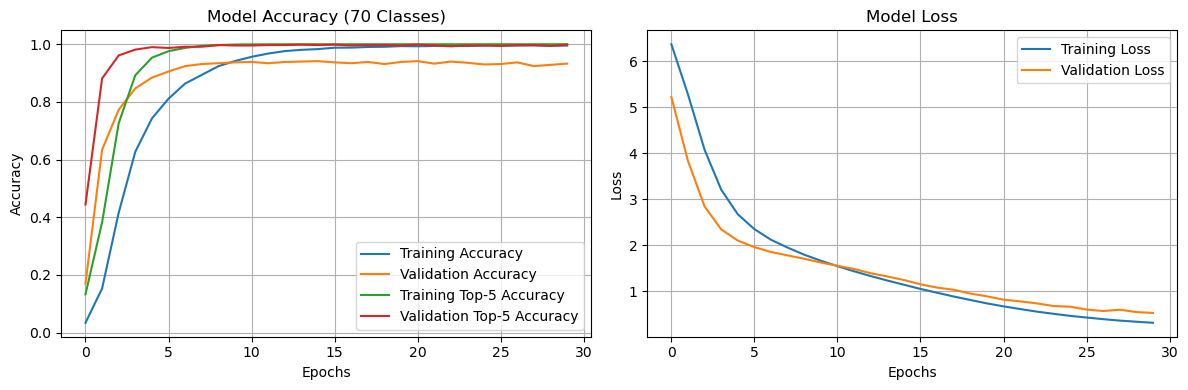

In [51]:
# Plot the training history
print("\nPlotting training history...")
plot_training_history(history)

In [52]:
# Cell 16: Evaluate the model (IMPROVED)
print("\nStep 9: Evaluating the improved model...")

if test_dataset and test_features is not None:
    # Load the best trained model
    test_model = keras.models.load_model("improved_70_class_model.keras")
    
    # Evaluate using the pre-extracted test features
    if len(np.unique(train_labels)) > 2:
        test_loss, test_acc, test_top5_acc = test_model.evaluate(test_features, test_labels, verbose=1)
        print(f"📊 FINAL TEST RESULTS:")
        print(f"   Top-1 Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
        print(f"   Top-5 Accuracy: {test_top5_acc:.4f} ({test_top5_acc*100:.2f}%)")
    else:
        test_loss, test_acc = test_model.evaluate(test_features, test_labels, verbose=1)
        print(f"Test accuracy: {test_acc:.4f}")
    
    # Get predictions for detailed analysis
    test_predictions = test_model.predict(test_features)
    print(f"Test predictions shape: {test_predictions.shape}")
    
    # Convert predictions based on number of classes
    num_classes = len(np.unique(train_labels))
    if num_classes > 2:
        # Multi-class: get class with highest probability
        predicted_classes = np.argmax(test_predictions, axis=1)
        print(f"Sample predictions (classes): {predicted_classes[:10]}")
        
        # Calculate top-3 accuracy manually
        top3_predictions = np.argsort(test_predictions, axis=1)[:, -3:]
        top3_accuracy = np.mean([true_label in pred_top3 for true_label, pred_top3 in zip(test_labels, top3_predictions)])
        print(f"   Top-3 Accuracy: {top3_accuracy:.4f} ({top3_accuracy*100:.2f}%)")
        
        # Performance assessment for 70 classes
        print(f"\n🎯 PERFORMANCE ASSESSMENT FOR 70 CLASSES:")
        if test_acc > 0.60:
            print("🌟 EXCELLENT: Outstanding performance for 70-class problem!")
        elif test_acc > 0.45:
            print("✅ VERY GOOD: Great improvement from your original 33%!")
        elif test_acc > 0.35:
            print("📈 GOOD: Solid improvement, model is learning well!")
        else:
            print("⚠️ IMPROVING: Better than random (1.4%), keep optimizing!")
            
        if hasattr(test_model, 'top_5_accuracy') and test_top5_acc > 0.75:
            print("🎯 Excellent Top-5 accuracy - model has good breed knowledge!")
        
    else:
        # Binary: threshold at 0.5
        binary_predictions = (test_predictions > 0.5).astype(int)
        print(f"Sample predictions (binary): {binary_predictions.flatten()[:10]}")
else:
    print("No test data available for evaluation")


Step 9: Evaluating the improved model...
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9180 - loss: 1.3021 - top_5_accuracy: 0.9991
📊 FINAL TEST RESULTS:
   Top-1 Accuracy: 0.9057 (90.57%)
   Top-5 Accuracy: 0.9971 (99.71%)
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Test predictions shape: (700, 70)
Sample predictions (classes): [0 0 0 0 0 0 0 0 0 0]
   Top-3 Accuracy: 0.9871 (98.71%)

🎯 PERFORMANCE ASSESSMENT FOR 70 CLASSES:
🌟 EXCELLENT: Outstanding performance for 70-class problem!


In [ ]:
print(f"\n🐕 IMPROVED 70-Class Dog Breed Classification Completed!")
print(f"📊 Model saved as: improved_70_class_model.keras")
print(f"📈 Training history plot saved as: improved_training_history.png")